In [73]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from openpyxl import load_workbook

### Functions

In [74]:
# prediction functions

def simple_moving_average(n: int, df: pd.DataFrame) -> pd.DataFrame:
    last_year = df["Year"].max()
    new_df = df.tail(n)

    for i in range(1, 6):
        mean_electricity = new_df["Electricity (Million kilowatt-hour)"].tail(n).mean()
        new_row = {"Year": last_year + i, "Electricity (Million kilowatt-hour)": mean_electricity}
        new_df.loc[len(new_df)] = new_row

    return new_df.tail(5).reset_index(drop=True)


def weighted_moving_average(n: int, weights: list, df: pd.DataFrame) -> pd.DataFrame:
    last_year = df["Year"].max()
    new_df = df.tail(n)
    for i in range(1, 6):
        weighted_mean = np.average(a=new_df["Electricity (Million kilowatt-hour)"].tail(n), weights=weights)
        new_row = {"Year": last_year + i, "Electricity (Million kilowatt-hour)": weighted_mean}
        new_df.loc[len(new_df)] = new_row

    return new_df.tail(5).reset_index(drop=True)


# Error functions   

def error(real_data: pd.DataFrame, predicted_data: pd.DataFrame) -> pd.DataFrame:
    error_df = pd.DataFrame({"year": real_data["Year"], "actual": real_data["Electricity (Million kilowatt-hour)"],
                             "predicted": predicted_data["Electricity (Million kilowatt-hour)"]})
    error_df["error"] = error_df["actual"] - error_df["predicted"]
    return error_df


def mean_absolute_deviation(Error: pd.DataFrame) -> float:
    deviation = Error["error"].abs().mean()
    return deviation

### Data

In [75]:
data = pd.read_csv("Data.csv")
data

,Year,Electricity (Million kilowatt-hour)
0,1344,816
1,1345,1062
2,1346,1409
3,1347,1924
4,1348,2562
5,1349,3418
6,1350,4519
7,1351,5723
8,1352,7796
9,1353,9152


In [76]:
Real_data = pd.read_csv("Real.csv")
Real_data

,Year,Electricity (Million kilowatt-hour)
0,1397,259723
1,1398,273750
2,1399,287378
3,1400,312000
4,1401,316632


### Simple  Moving Average  With 3 Years

C:\Users\Nassrin Sharifi\AppData\Local\Temp\ipykernel_17060\1253688696.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[len(new_df)] = new_row
C:\Users\Nassrin Sharifi\AppData\Local\Temp\ipykernel_17060\1253688696.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[len(new_df)] = new_row
C:\Users\Nassrin Sharifi\AppData\Local\Temp\ipykernel_17060\1253688696.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

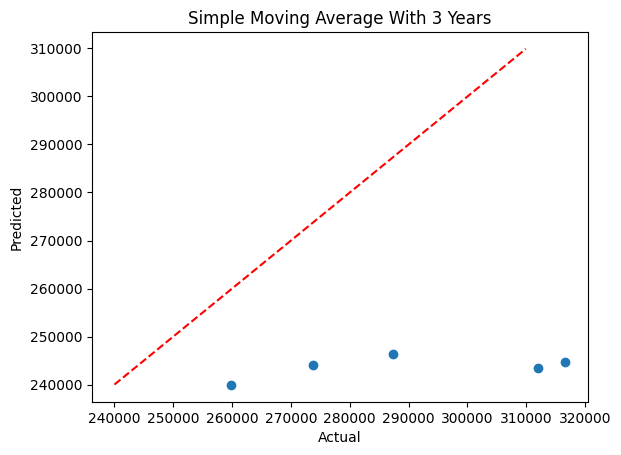

Mean Square Error for simple moving average with 3 years is 2565802462.24
Mean Absolute Error for simple moving average with 3 years is 46189.03


In [77]:
n = 3
simple = simple_moving_average(n, data)
simple_df_3 = error(Real_data, simple)
m = mean_squared_error(simple_df_3["actual"], simple_df_3["predicted"],squared=True)
deviation = mean_absolute_deviation(simple_df_3)

#plot:)
plt.scatter(simple_df_3["actual"], simple_df_3["predicted"])
plt.plot(list(range(240000,310000,100)),list(range(240000,310000,100)),color="red",linestyle="dashed")
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.title(f"Simple Moving Average With {n} Years")
plt.savefig(f"Simple Moving Average With {n} Years.png")
plt.show()
print(f"Mean Square Error for simple moving average with {n} years is {m:.2f}")
print(f"Mean Absolute Error for simple moving average with {n} years is {deviation:.2f}")
simple_df_3.to_excel(f"Simple Moving Average With {n} Years.xlsx",index=False)


### Simple Moving Average With 5 Years

C:\Users\Nassrin Sharifi\AppData\Local\Temp\ipykernel_17060\1253688696.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[len(new_df)] = new_row
C:\Users\Nassrin Sharifi\AppData\Local\Temp\ipykernel_17060\1253688696.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[len(new_df)] = new_row
C:\Users\Nassrin Sharifi\AppData\Local\Temp\ipykernel_17060\1253688696.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

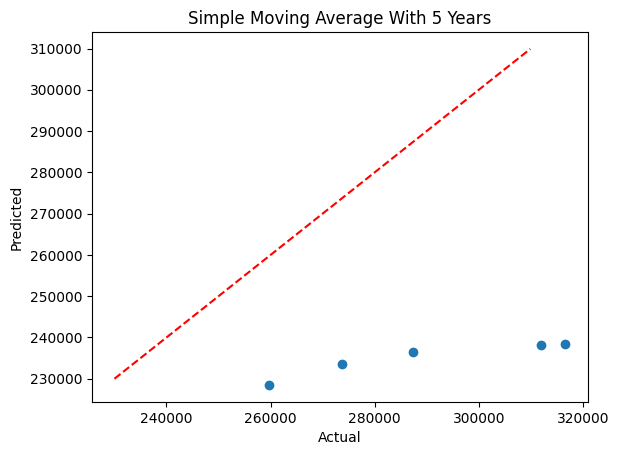

Mean Square Error for simple moving average with 5 years is 3353717166.06
Mean Absolute Error for simple moving average with 5 years is 54900.44


In [78]:
n = 5
simple = simple_moving_average(n, data)
simple_df_5 = error(Real_data, simple)
m = mean_squared_error(simple_df_5["actual"], simple_df_5["predicted"],squared=True)
deviation = mean_absolute_deviation(simple_df_5)

#plot:)
plt.scatter(simple_df_5["actual"], simple_df_5["predicted"])
plt.plot(list(range(230000,310000,100)),list(range(230000,310000,100)),color="red",linestyle="dashed")
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.title(f"Simple Moving Average With {n} Years")
plt.savefig(f"Simple Moving Average With {n} Years.png")
plt.show()
print(f"Mean Square Error for simple moving average with {n} years is {m:.2f}")
print(f"Mean Absolute Error for simple moving average with {n} years is {deviation:.2f}")
simple_df_5.to_excel(f"Simple Moving Average With {n} Years.xlsx",index=False)


### Simple Moving Average With 9 Years 

C:\Users\Nassrin Sharifi\AppData\Local\Temp\ipykernel_17060\1253688696.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[len(new_df)] = new_row
C:\Users\Nassrin Sharifi\AppData\Local\Temp\ipykernel_17060\1253688696.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[len(new_df)] = new_row
C:\Users\Nassrin Sharifi\AppData\Local\Temp\ipykernel_17060\1253688696.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

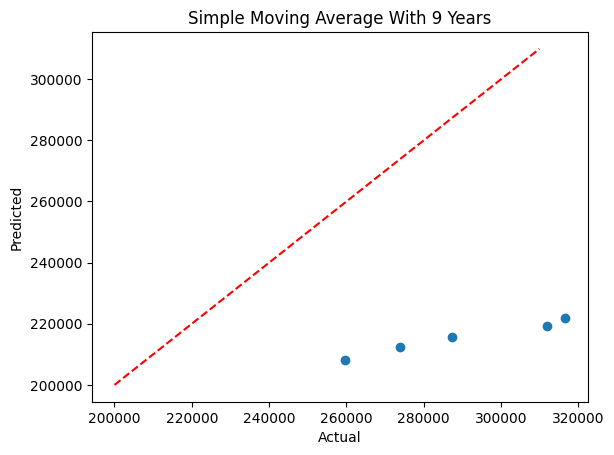

Mean Square Error for simple moving average with 9 years is 5821338815.28
Mean Absolute Error for simple moving average with 9 years is 74375.53


In [79]:
n = 9
simple = simple_moving_average(n, data)
simple_df_9 = error(Real_data, simple)
m = mean_squared_error(simple_df_9["actual"], simple_df_9["predicted"],squared=True)
deviation = mean_absolute_deviation(simple_df_9)

#plot:)
plt.scatter(simple_df_9["actual"], simple_df_9["predicted"])
plt.plot(list(range(200000,310000,100)),list(range(200000,310000,100)),color="red",linestyle="dashed")
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.title(f"Simple Moving Average With {n} Years")
plt.savefig(f"Simple Moving Average With {n} Years.png")
plt.show()
print(f"Mean Square Error for simple moving average with {n} years is {m:.2f}")
print(f"Mean Absolute Error for simple moving average with {n} years is {deviation:.2f}")
simple_df_9.to_excel(f"Simple Moving Average With {n} Years.xlsx",index=False)


### Weighted Moving Average for 3 Years

C:\Users\Nassrin Sharifi\AppData\Local\Temp\ipykernel_17060\1253688696.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[len(new_df)] = new_row
C:\Users\Nassrin Sharifi\AppData\Local\Temp\ipykernel_17060\1253688696.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[len(new_df)] = new_row
C:\Users\Nassrin Sharifi\AppData\Local\Temp\ipykernel_17060\1253688696.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

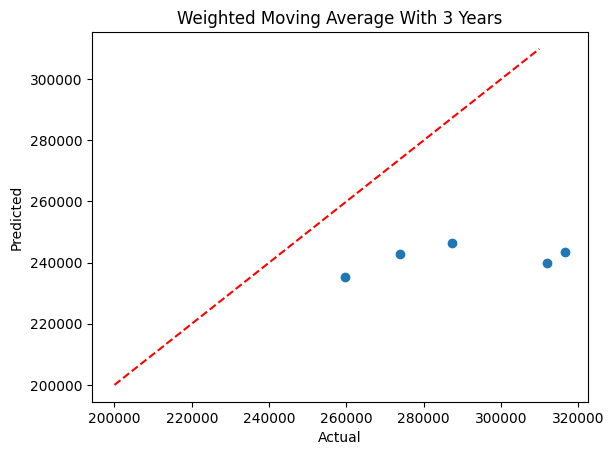

Mean Square Error for weighted moving average with 3 years is 2756804791.16
Mean Absolute Error for weighted moving average with 3 years is 48296.81


In [80]:
n=3
weights=[0.5, 0.33, 0.17]
weighted = weighted_moving_average(n=n,weights=weights,df=data)

weighted_df = error(Real_data, weighted)
m=mean_squared_error(weighted_df["actual"],weighted_df["predicted"],squared=True)
deviation=mean_absolute_deviation(weighted_df)

#plot:)
plt.scatter(weighted_df["actual"],weighted_df["predicted"])
plt.plot(list(range(200000,310000,100)),list(range(200000,310000,100)),color="red",linestyle="dashed")
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.title(f"Weighted Moving Average With {n} Years")
plt.savefig(f"Weighted Moving Average With {n} Years.png")
plt.show()
print(f"Mean Square Error for weighted moving average with {n} years is {m:.2f}")
print(f"Mean Absolute Error for weighted moving average with {n} years is {deviation:.2f}")
weighted_df.to_excel(f"Weighted Moving Average With {n} Years.xlsx",index=False)


### Bonus

In [81]:
#Smoothing Functions
def single_exponential_smoothing(alfa:float,df:pd.DataFrame):
    new_df=df.copy()
    for i in range(len(df)-1):
        new_df.iloc[i+1,2]=new_df.iloc[i,2]+ alfa * new_df.iloc[i,3]
        new_df.iloc[i+1,3]=new_df.iloc[i+1,1]-new_df.iloc[i+1,2]
    return new_df
  
def new_sheet(existing_file_name:str,new_sheet:pd.DataFrame,sheet_name:str):
    initial_data=pd.read_excel(f"{existing_file_name}.xlsx")
    excel_writer=pd.ExcelWriter(f"{existing_file_name}.xlsx")
    initial_data.to_excel(excel_writer,sheet_name=existing_file_name,index=False)
    new_sheet.to_excel(excel_writer,sheet_name=sheet_name,index=False)
    excel_writer.close()


### Simple Moving Average With 3 Years

C:\Python Projects\Interpreters\Pure Python\Lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")
C:\Users\Nassrin Sharifi\AppData\Local\Temp\ipykernel_17060\1253688696.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[len(new_df)] = new_row
C:\Users\Nassrin Sharifi\AppData\Local\Temp\ipykernel_17060\1253688696.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[len(new_df)] = new_row
C:\Users\Nassri

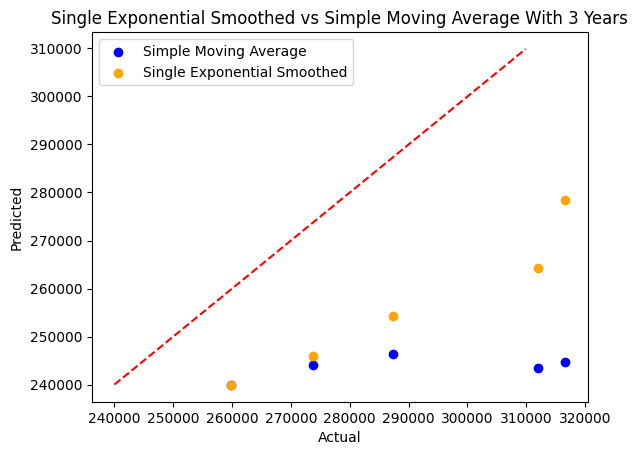

Mean Square Error for smooth moving average with 3 years is 1201610368.38
Mean Absolute Error for smooth moving average with 3 years is 33353.57


In [82]:
smoothed_simple_3=single_exponential_smoothing(0.3,simple_df_3)
new_sheet("Simple Moving Average With 3 Years",smoothed_simple_3,"single_exponential_smoothing")



n = 3
simple = simple_moving_average(n, data)
simple_df_3 = error(Real_data, simple)
m = mean_squared_error(smoothed_simple_3["actual"], smoothed_simple_3["predicted"],squared=True)
deviation = mean_absolute_deviation(smoothed_simple_3)

#plot:)
plt.scatter(simple_df_3["actual"], simple_df_3["predicted"],color="blue" ,label="Simple Moving Average")
plt.scatter(smoothed_simple_3["actual"], smoothed_simple_3["predicted"],color="orange",label="Single Exponential Smoothed")
plt.legend()

plt.plot(list(range(240000,310000,100)),list(range(240000,310000,100)),color="red",linestyle="dashed")
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.title(f"Single Exponential Smoothed vs Simple Moving Average With {n} Years")
plt.savefig(f"Smooth Moving Average With {n} Years.png")
plt.show()
print(f"Mean Square Error for smooth moving average with {n} years is {m:.2f}")
print(f"Mean Absolute Error for smooth moving average with {n} years is {deviation:.2f}")





### Simple Moving Average With 5 Years

C:\Python Projects\Interpreters\Pure Python\Lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")
C:\Users\Nassrin Sharifi\AppData\Local\Temp\ipykernel_17060\1253688696.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[len(new_df)] = new_row
C:\Users\Nassrin Sharifi\AppData\Local\Temp\ipykernel_17060\1253688696.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[len(new_df)] = new_row
C:\Users\Nassri

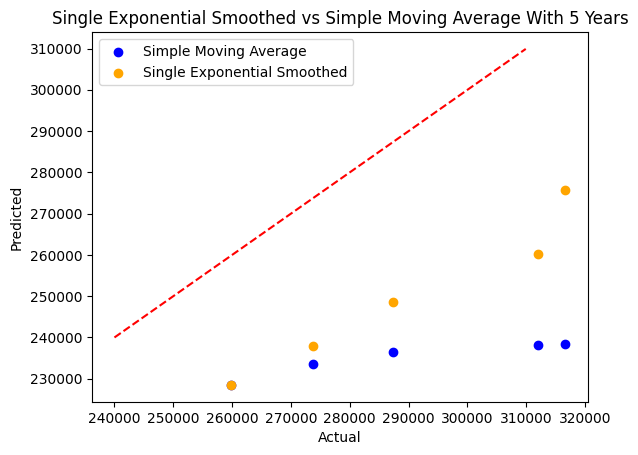

Mean Square Error for smooth moving average with 5 years is 1621913011.90
Mean Absolute Error for smooth moving average with 5 years is 39688.26


In [83]:
smoothed_simple_5=single_exponential_smoothing(0.3,simple_df_5)
new_sheet("Simple Moving Average With 5 Years",smoothed_simple_5,"single_exponential_smoothing")


n = 5
simple = simple_moving_average(n, data)
simple_df_5 = error(Real_data, simple)
m = mean_squared_error(smoothed_simple_5["actual"], smoothed_simple_5["predicted"],squared=True)
deviation = mean_absolute_deviation(smoothed_simple_5)

#plot:)
plt.scatter(simple_df_5["actual"], simple_df_5["predicted"],color="blue" ,label="Simple Moving Average")
plt.scatter(smoothed_simple_5["actual"], smoothed_simple_5["predicted"],color="orange",label="Single Exponential Smoothed")
plt.legend()

plt.plot(list(range(240000,310000,100)),list(range(240000,310000,100)),color="red",linestyle="dashed")
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.title(f"Single Exponential Smoothed vs Simple Moving Average With {n} Years")
plt.savefig(f"Smooth Moving Average With {n} Years.png")
plt.show()
print(f"Mean Square Error for smooth moving average with {n} years is {m:.2f}")
print(f"Mean Absolute Error for smooth moving average with {n} years is {deviation:.2f}")


### Simple Moving Average With 9 Years

C:\Python Projects\Interpreters\Pure Python\Lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")
C:\Users\Nassrin Sharifi\AppData\Local\Temp\ipykernel_17060\1253688696.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[len(new_df)] = new_row
C:\Users\Nassrin Sharifi\AppData\Local\Temp\ipykernel_17060\1253688696.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[len(new_df)] = new_row
C:\Users\Nassri

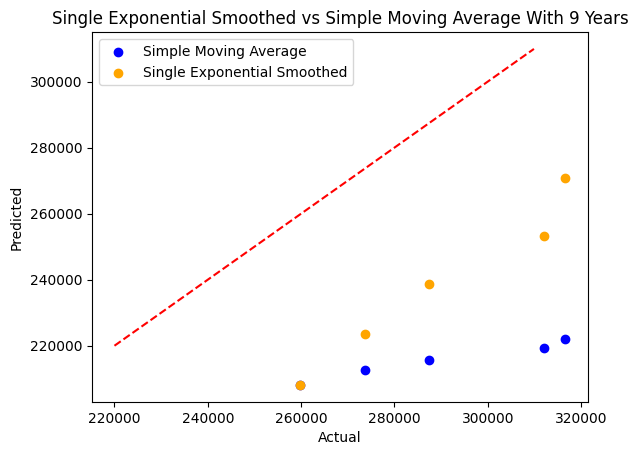

Mean Square Error for smooth moving average with 9 years is 2618376569.31
Mean Absolute Error for smooth moving average with 9 years is 50986.73


In [89]:
smoothed_simple_9=single_exponential_smoothing(0.3,simple_df_9)
new_sheet("Simple Moving Average With 9 Years",smoothed_simple_9,"single_exponential_smoothing")

n = 9
simple = simple_moving_average(n, data)
simple_df_9 = error(Real_data, simple)
m = mean_squared_error(smoothed_simple_9["actual"], smoothed_simple_9["predicted"], squared=True)
deviation = mean_absolute_deviation(smoothed_simple_9)

#plot:)
plt.scatter(simple_df_9["actual"], simple_df_9["predicted"], color="blue", label="Simple Moving Average")
plt.scatter(smoothed_simple_9["actual"], smoothed_simple_9["predicted"], color="orange",
            label="Single Exponential Smoothed")
plt.legend()

plt.plot(list(range(220000, 310000, 100)), list(range(220000, 310000, 100)), color="red", linestyle="dashed")
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.title(f"Single Exponential Smoothed vs Simple Moving Average With {n} Years")
plt.savefig(f"Smooth Moving Average With {n} Years.png")
plt.show()
print(f"Mean Square Error for smooth moving average with {n} years is {m:.2f}")
print(f"Mean Absolute Error for smooth moving average with {n} years is {deviation:.2f}")



### Weighted Moving Average With 3 Years

C:\Python Projects\Interpreters\Pure Python\Lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")
C:\Users\Nassrin Sharifi\AppData\Local\Temp\ipykernel_17060\1253688696.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[len(new_df)] = new_row
C:\Users\Nassrin Sharifi\AppData\Local\Temp\ipykernel_17060\1253688696.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[len(new_df)] = new_row
C:\Users\Nassri

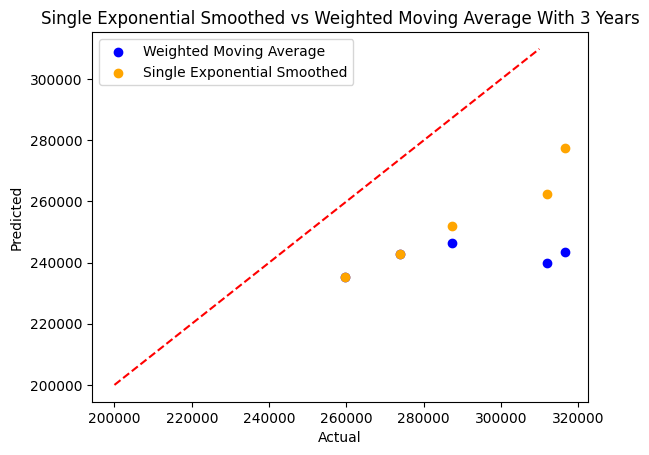

Mean Square Error for weighted moving average with 3 years is 1357502005.28
Mean Absolute Error for weighted moving average with 3 years is 35882.84


In [87]:
smoothed_weighted=single_exponential_smoothing(0.3,weighted_df)
new_sheet("Weighted Moving Average With 3 Years",smoothed_weighted,"single_exponential_smoothing")


n=3
weights=[0.5, 0.33, 0.17]
weighted = weighted_moving_average(n=n,weights=weights,df=data)

weighted_df = error(Real_data, weighted)
m=mean_squared_error(smoothed_weighted["actual"],smoothed_weighted["predicted"],squared=True)
deviation=mean_absolute_deviation(smoothed_weighted)

#plot:)
plt.scatter(weighted_df["actual"],weighted_df["predicted"], color="blue", label="Weighted Moving Average")
plt.scatter(smoothed_weighted["actual"],smoothed_weighted["predicted"],color="orange",label="Single Exponential Smoothed")
plt.legend()
plt.plot(list(range(200000,310000,100)),list(range(200000,310000,100)),color="red",linestyle="dashed")
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.title(f"Single Exponential Smoothed vs Weighted Moving Average With {n} Years")
plt.savefig(f"Smooth-Weighted Moving Average With {n} Years.png")
plt.show()
print(f"Mean Square Error for weighted moving average with {n} years is {m:.2f}")
print(f"Mean Absolute Error for weighted moving average with {n} years is {deviation:.2f}")

